In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv("Online.csv")

In [3]:
# Show first 5 rows

df.head()

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435


In [4]:
# Check overall shape (rows, columns)

df.shape

(388, 16)

In [5]:
# Check missing values column-wise

df.isnull().sum()

Unnamed: 0                      0
order_status                    0
Monthly Income                  0
latitude                        0
Marital Status                  0
Gender                          0
employment_status               0
Family size                    19
Reviews                         0
Pin code                        0
Age                            19
longitude                       0
Educational Qualifications      0
Unnamed: 13                     0
9                             388
#@%                           382
dtype: int64

In [6]:
# Drop unnecessary columns

df = df.drop(columns = [ "Unnamed: 0", "Unnamed: 13", "9", "#@%" ])

In [7]:
# View updated dataframe

df

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,Single,Female,Student,5.0,Positive,560051,24.0,77.5987,Post Graduate
384,Yes,No Income,13.0223,Single,Male,Student,3.0,Positive,560049,23.0,77.7132,Graduate
385,Yes,10001 to 25000,12.9850,Single,Female,Student,5.0,Positive,560010,22.0,77.5533,Post Graduate
386,Yes,10001 to 25000,12.9698,Single,Female,Employee,3.0,Positive,560066,22.0,77.7500,Graduate


In [8]:
# Check nulls again after removing columns

df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                   19
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

In [9]:
# Shape after cleanup

df.shape

(388, 12)

In [10]:
df

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,Single,Female,Student,5.0,Positive,560051,24.0,77.5987,Post Graduate
384,Yes,No Income,13.0223,Single,Male,Student,3.0,Positive,560049,23.0,77.7132,Graduate
385,Yes,10001 to 25000,12.9850,Single,Female,Student,5.0,Positive,560010,22.0,77.5533,Post Graduate
386,Yes,10001 to 25000,12.9698,Single,Female,Employee,3.0,Positive,560066,22.0,77.7500,Graduate


<Axes: >

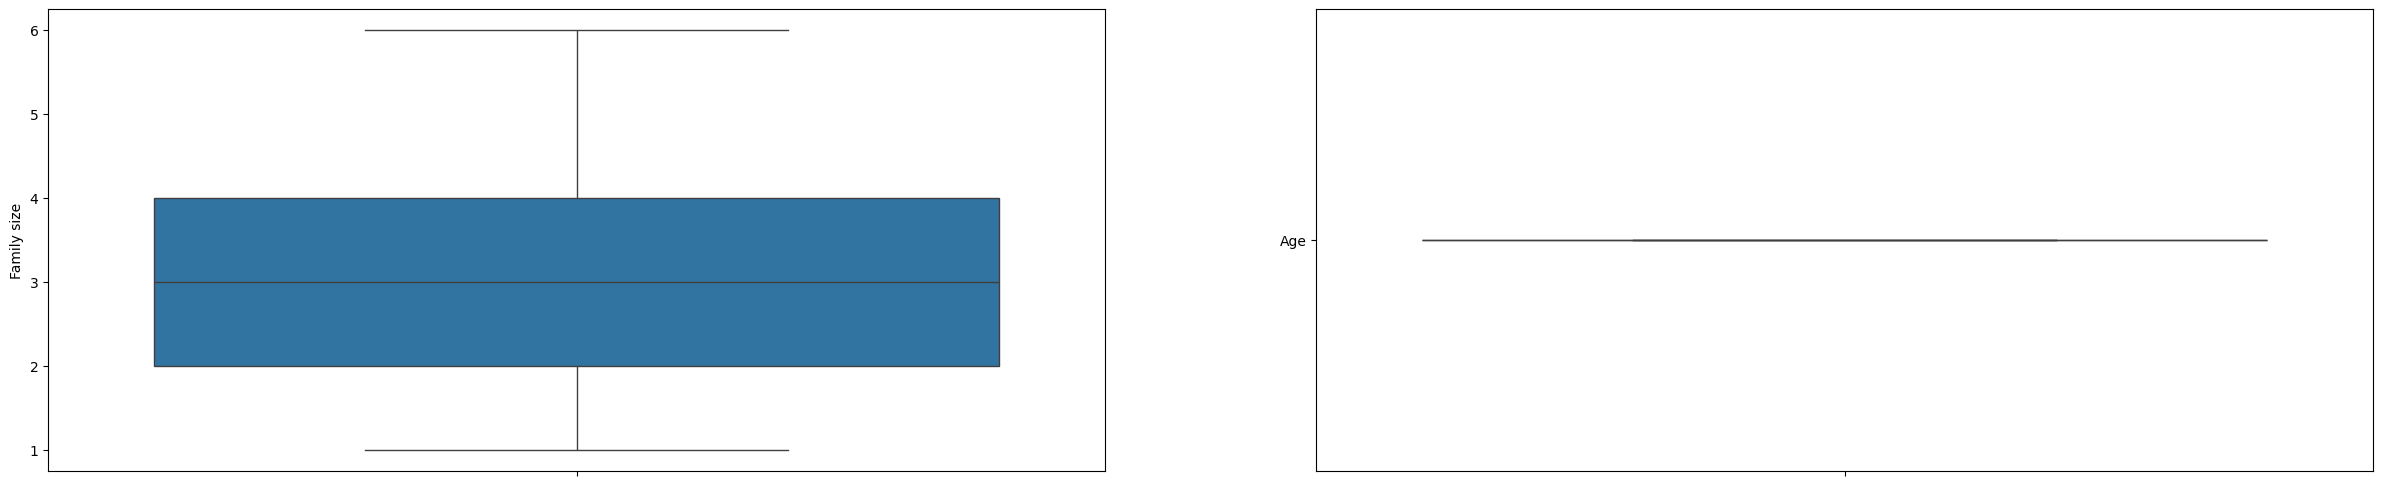

In [11]:
# Plot boxplots to inspect outliers

plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
sns.boxplot(df["Family size"])
plt.subplot(1,2,2)
sns.boxplot(["Age"])

In [12]:
# Calculate mean of Family size

family_size_mean_value = int(df["Family size"].mean())

In [13]:
family_size_mean_value

3

In [14]:
# Fill missing Family size with mean

df["Family size"] = df["Family size"].fillna(family_size_mean_value)

In [15]:
df["Family size"]

0      5.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
383    5.0
384    3.0
385    5.0
386    3.0
387    1.0
Name: Family size, Length: 388, dtype: float64

In [16]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                    0
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

In [17]:
# Median age for imputation

age_median_value = df["Age"].median()

In [18]:
# Fill missing Age with median

df["Age"] = df["Age"].fillna(age_median_value)

In [19]:
df.isnull().sum()

order_status                  0
Monthly Income                0
latitude                      0
Marital Status                0
Gender                        0
employment_status             0
Family size                   0
Reviews                       0
Pin code                      0
Age                           0
longitude                     0
Educational Qualifications    0
dtype: int64

<Axes: >

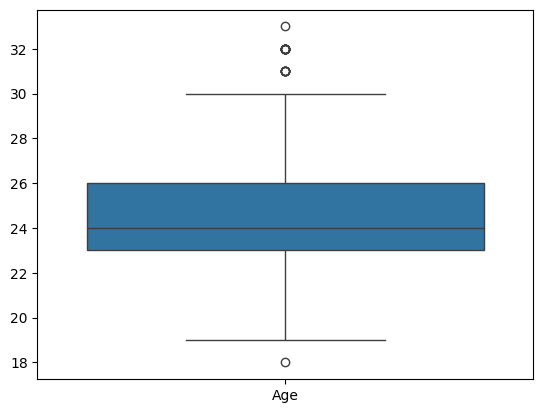

In [20]:
# Boxplot after imputing

sns.boxplot([df["Age"]])

In [21]:
# Describe Age statistics

df.describe()["Age"]

count    388.000000
mean      24.634021
std        2.897932
min       18.000000
25%       23.000000
50%       24.000000
75%       26.000000
max       33.000000
Name: Age, dtype: float64

In [22]:
# Calculate Q1, Q3 for IQR method

Q1 = df.describe()["Age"]["25%"]

In [23]:
Q1

np.float64(23.0)

In [24]:
Q3 = df.describe()["Age"]["75%"]

In [25]:
Q3

np.float64(26.0)

In [26]:
IQR = Q3 -Q1
IQR

np.float64(3.0)

In [27]:
# Lower and upper limits for outlier clipping

lower_limit = Q1 - 1.5 * IQR
lower_limit

np.float64(18.5)

In [28]:
upper_limit = Q3 + 1.5 * IQR
upper_limit 

np.float64(30.5)

In [29]:
# Clip outliers in Age column

df["Age"] = df["Age"].clip( lower_limit, upper_limit )

<Axes: ylabel='Age'>

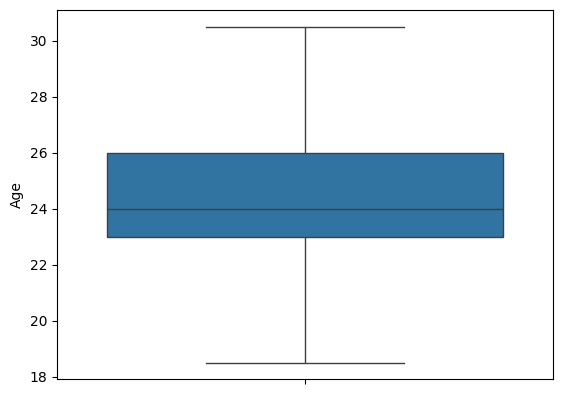

In [30]:
# Check Age boxplot after removing outliers

sns.boxplot(df["Age"])

In [31]:
df

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,Single,Female,Student,5.0,Positive,560051,24.0,77.5987,Post Graduate
384,Yes,No Income,13.0223,Single,Male,Student,3.0,Positive,560049,23.0,77.7132,Graduate
385,Yes,10001 to 25000,12.9850,Single,Female,Student,5.0,Positive,560010,22.0,77.5533,Post Graduate
386,Yes,10001 to 25000,12.9698,Single,Female,Employee,3.0,Positive,560066,22.0,77.7500,Graduate


In [32]:
df.columns

Index(['order_status', 'Monthly Income', 'latitude', 'Marital Status',
       'Gender', 'employment_status', 'Family size', 'Reviews', 'Pin code',
       'Age', 'longitude', 'Educational Qualifications'],
      dtype='object')

In [33]:
pd.get_dummies( df, columns = ["Gender", "Marital Status", "employment_status"], dtype = 'int64', drop_first = True )

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,25001 to 50000,13.0262,5.0,Positive,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,No Income,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,1,0,1,0,0,1
2,Yes,No Income,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,0,0,1,0,0,1
3,Yes,No Income,13.0019,3.0,Positive,560003,24.0,77.5713,Post Graduate,0,0,1,0,0,1
4,Yes,More than 50000,13.0626,3.0,Positive,560015,24.0,77.5284,School,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,5.0,Positive,560051,24.0,77.5987,Post Graduate,0,0,1,0,0,1
384,Yes,No Income,13.0223,3.0,Positive,560049,23.0,77.7132,Graduate,1,0,1,0,0,1
385,Yes,10001 to 25000,12.9850,5.0,Positive,560010,22.0,77.5533,Post Graduate,0,0,1,0,0,1
386,Yes,10001 to 25000,12.9698,3.0,Positive,560066,22.0,77.7500,Graduate,0,0,1,0,0,0


In [34]:
df = pd.get_dummies( df, columns = ["Gender", "Marital Status", "employment_status"], dtype = 'int64', drop_first = True )

In [35]:
df.head()

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,25001 to 50000,13.0262,5.0,Positive,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,No Income,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,1,0,1,0,0,1
2,Yes,No Income,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,0,0,1,0,0,1
3,Yes,No Income,13.0019,3.0,Positive,560003,24.0,77.5713,Post Graduate,0,0,1,0,0,1
4,Yes,More than 50000,13.0626,3.0,Positive,560015,24.0,77.5284,School,1,0,0,0,1,0


In [36]:
# Strip extra spaces in text columns

df["Reviews"] = df["Reviews"].str.strip()

In [37]:
df.columns

Index(['order_status', 'Monthly Income', 'latitude', 'Family size', 'Reviews',
       'Pin code', 'Age', 'longitude', 'Educational Qualifications',
       'Gender_Male', 'Marital Status_Prefer not to say',
       'Marital Status_Single', 'employment_status_House wife',
       'employment_status_Self Employeed', 'employment_status_Student'],
      dtype='object')

In [38]:
df["Monthly Income"] = df["Monthly Income"].str.strip()
df["Educational Qualifications"] = df["Educational Qualifications"].str.strip()

In [39]:
# Map Reviews → numeric

review_dict = { "Positive" : 1, "Negative" : 0 }

df["Reviews"] = df["Reviews"].map(review_dict)

In [40]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,25001 to 50000,13.0262,5.0,1,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,No Income,12.9770,3.0,1,560009,24.0,77.5773,Post Graduate,1,0,1,0,0,1
2,Yes,No Income,12.9770,3.0,1,560009,24.0,77.5773,Post Graduate,0,0,1,0,0,1
3,Yes,No Income,13.0019,3.0,1,560003,24.0,77.5713,Post Graduate,0,0,1,0,0,1
4,Yes,More than 50000,13.0626,3.0,1,560015,24.0,77.5284,School,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,No Income,12.9883,5.0,1,560051,24.0,77.5987,Post Graduate,0,0,1,0,0,1
384,Yes,No Income,13.0223,3.0,1,560049,23.0,77.7132,Graduate,1,0,1,0,0,1
385,Yes,10001 to 25000,12.9850,5.0,1,560010,22.0,77.5533,Post Graduate,0,0,1,0,0,1
386,Yes,10001 to 25000,12.9698,3.0,1,560066,22.0,77.7500,Graduate,0,0,1,0,0,0


In [41]:
df["Reviews"].value_counts()

Reviews
1    317
0     71
Name: count, dtype: int64

In [42]:
df["Monthly Income"].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [43]:
# Map income levels to numeric ordinal scale

income_dict = {
    "No Income" : 1,
    "Below Rs.10000" : 2,
    "10001 to 25000" : 3,
    "25001 to 50000" : 4,
    "More than 50000" : 5
}

df["Monthly Income"] = df["Monthly Income"].map(income_dict)

In [44]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,4,13.0262,5.0,1,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,1,12.9770,3.0,1,560009,24.0,77.5773,Post Graduate,1,0,1,0,0,1
2,Yes,1,12.9770,3.0,1,560009,24.0,77.5773,Post Graduate,0,0,1,0,0,1
3,Yes,1,13.0019,3.0,1,560003,24.0,77.5713,Post Graduate,0,0,1,0,0,1
4,Yes,5,13.0626,3.0,1,560015,24.0,77.5284,School,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,1,12.9883,5.0,1,560051,24.0,77.5987,Post Graduate,0,0,1,0,0,1
384,Yes,1,13.0223,3.0,1,560049,23.0,77.7132,Graduate,1,0,1,0,0,1
385,Yes,3,12.9850,5.0,1,560010,22.0,77.5533,Post Graduate,0,0,1,0,0,1
386,Yes,3,12.9698,3.0,1,560066,22.0,77.7500,Graduate,0,0,1,0,0,0


In [45]:
# Check education value counts

df["Educational Qualifications"].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [46]:
education_dict = {
    "Uneducated" : 1,
    "School" : 2,
    "Ph.D": 3,
    "Post Graduate": 4,
    "Graduate" : 5  
}

df["Educational Qualifications"] = df["Educational Qualifications"].map(education_dict)

In [47]:
df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,Yes,4,13.0262,5.0,1,560045,28.0,77.6200,4,1,0,0,0,0,0
1,Yes,1,12.9770,3.0,1,560009,24.0,77.5773,4,1,0,1,0,0,1
2,Yes,1,12.9770,3.0,1,560009,24.0,77.5773,4,0,0,1,0,0,1
3,Yes,1,13.0019,3.0,1,560003,24.0,77.5713,4,0,0,1,0,0,1
4,Yes,5,13.0626,3.0,1,560015,24.0,77.5284,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Yes,1,12.9883,5.0,1,560051,24.0,77.5987,4,0,0,1,0,0,1
384,Yes,1,13.0223,3.0,1,560049,23.0,77.7132,5,1,0,1,0,0,1
385,Yes,3,12.9850,5.0,1,560010,22.0,77.5533,4,0,0,1,0,0,1
386,Yes,3,12.9698,3.0,1,560066,22.0,77.7500,5,0,0,1,0,0,0


In [48]:
# Map order_status Yes/No → binary

order_status_dict = { "Yes" : 1, "No" : 0}


df["order_status"] = df["order_status"].map(order_status_dict)

In [49]:
# Final cleaned dataset

df

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,employment_status_House wife,employment_status_Self Employeed,employment_status_Student
0,1,4,13.0262,5.0,1,560045,28.0,77.6200,4,1,0,0,0,0,0
1,1,1,12.9770,3.0,1,560009,24.0,77.5773,4,1,0,1,0,0,1
2,1,1,12.9770,3.0,1,560009,24.0,77.5773,4,0,0,1,0,0,1
3,1,1,13.0019,3.0,1,560003,24.0,77.5713,4,0,0,1,0,0,1
4,1,5,13.0626,3.0,1,560015,24.0,77.5284,2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,1,1,12.9883,5.0,1,560051,24.0,77.5987,4,0,0,1,0,0,1
384,1,1,13.0223,3.0,1,560049,23.0,77.7132,5,1,0,1,0,0,1
385,1,3,12.9850,5.0,1,560010,22.0,77.5533,4,0,0,1,0,0,1
386,1,3,12.9698,3.0,1,560066,22.0,77.7500,5,0,0,1,0,0,0
